5


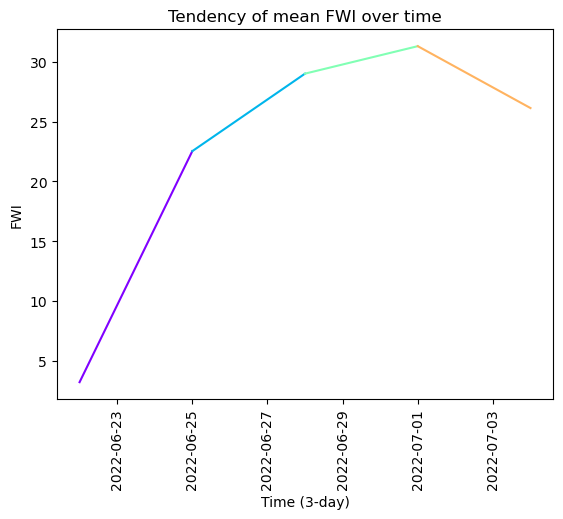

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pdtotal = pd.read_csv('Samples/2022/2022byHourFWIXFFMCFireHour.csv')
pdtotal['hourly.time'] = pd.to_datetime(pdtotal['hourly.time'])

#fwix,ffmc,dmc,dc,isi,bui

var = "FWI"
var_field = "fwix"
_year = 2022

chunk_size = 24*3
num_chunks = len(pdtotal) // chunk_size + 1
print(num_chunks)

fig, ax = plt.subplots()

colors = cm.rainbow(np.linspace(0, 1, num_chunks))

means = []
times = []

for i in range(num_chunks):
    chunk = pdtotal[i*chunk_size:(i+1)*chunk_size]
    if chunk.empty:
        continue

    means.append(chunk[var_field].mean())
    times.append(chunk['hourly.time'].iloc[0])


for i in range(1, len(times)):
    ax.plot(times[i-1:i+1], means[i-1:i+1], color=colors[i-1])



plt.xticks(rotation=90)
    
ax.set_xlabel('Time (3-day)')
ax.set_ylabel(var)
ax.set_title(f'Tendency of mean {var} over time')


plt.savefig(f'{_year}_tendency_graph_{var}.png', dpi=300, bbox_inches='tight')

plt.show()